In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

### Задание 1. 
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
X, y = make_regression(n_samples=100, n_features=15)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

#### Градиентный спуск

In [4]:
alpha = 0.4
W = np.ones(X.shape[1])

n = X.shape[0]
err, err_prev = 0, 1
i = 0
while (np.abs(err_prev - err)) > 0.005: 
    y_pred = np.dot(X, W)   
    err_prev, err = err, calc_mse(y, y_pred)    
    W -= (alpha * (1/n * 2 * np.dot(X.T,(y_pred - y))))
    if i % n == 0:
        print(i, err)
    i += 1    
n_iter_new = i
if i % n != 0:
    print(i, err)
print('\nскорость обучения (alpha) =', alpha)
print('количество итераций =', n_iter_new)

0 32595.939872144336
15 0.002214321221076863

скорость обучения (alpha) = 0.4
количество итераций = 15


#### Стохастический градиентный спуск

In [5]:
np.random.seed(42)

W = np.ones(X.shape[1])
err, err_prev = 0, 1
i = 0
while (np.abs(err_prev - err)) > 0.005: 
    train_ind = np.random.randint(X.shape[0])
    y_pred = np.dot(X[train_ind], W)    
    err_prev, err = err, calc_mse(y[train_ind], y_pred)
    
    W -= (alpha * (1/n * 2 * np.dot(X[train_ind].T, (y_pred - y[train_ind]))))
    if i % 100 == 0:
        print(i, err)
    i += 1    
n_iter_new = i
if i % n != 0:
    print(i, err)
print('\nскорость обучения (alpha) =', alpha)
print('количество итераций =', n_iter_new)

0 37210.14873537464
100 1662.9480334904347
200 1611.4463926431174
300 484.0061740487649
400 8.603634944422762
500 23.748204132062067
600 0.4972192154770753
700 5.981653091476679
796 0.032367352152830084

скорость обучения (alpha) = 0.4
количество итераций = 796


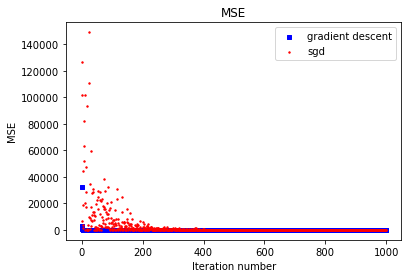

In [6]:
def cost_history(alpha, n_iter, gd_type):
    W = np.ones(X.shape[1])
    cost_history = []
    for i in range(n_iter):
        if gd_type == 0:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred) 
            W -= (alpha * (1/n * 2 * np.dot(X.T,(y_pred - y))))
        else:
            train_ind = np.random.randint(X.shape[0])
            y_pred = np.dot(X[train_ind], W)
            err = calc_mse(y[train_ind], y_pred)
            W -= (alpha * (1/n * 2 * np.dot(X[train_ind].T, (y_pred - y[train_ind]))))
        cost_history.append(err)
    return cost_history

n_iter = 1000
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 0), s=20, c='b', marker="s", label='gradient descent')
ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 1), s=2, c='r', marker="o", label='sgd')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc='upper right');
plt.show()

Скорость сходимости стохастического градиентного спуска значительно ниже, чем у градиентного спуска

### Задание 2.
Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [7]:
def ridge_err(y, y_pred, L, W):
    err = np.mean((y - y_pred)**2 + L*np.dot(W.T, W))
    return err

#### Градиентный спуск

In [8]:
alpha = 0.4
W = np.ones(X.shape[1])
L = 0.5
n = X.shape[0]
err, err_prev = 0, 1
i = 0
while (np.abs(err_prev - err)) > 0.005: 
    y_pred = np.dot(X, W)   
    err_prev, err = err, ridge_err(y, y_pred, L, W)    
    W -= (alpha * (2/n * (np.dot(X.T,(y_pred - y)) + L * W)))
    if i % 10 == 0:
        print(i, err)
    i += 1    
n_iter_new = i
if i % n != 0:
    print(i, err)
print('\nскорость обучения (alpha) =', alpha)
print('количество итераций =', n_iter_new)

0 32603.439872144336
10 18378.627241344388
20 18391.02979409059
28 18391.14855526157

скорость обучения (alpha) = 0.4
количество итераций = 28


#### Стохастический градиентный спуск

In [9]:
np.random.seed(42)

W = np.ones(X.shape[1])
err, err_prev = 0, 1
i = 0
while (np.abs(err_prev - err)) > 0.005: 
    train_ind = np.random.randint(X.shape[0])
    y_pred = np.dot(X[train_ind], W)    
    err_prev, err = err, ridge_err(y[train_ind], y_pred, L, W)
    
    W -= (alpha * (2/n * (np.dot(X[train_ind].T, (y_pred - y[train_ind]))+ L * W)))
    if i % 100000 == 0:
        print(i, err)
    i += 1    
n_iter_new = i
if i % n != 0:
    print(i, err)
print('\nскорость обучения (alpha) =', alpha)
print('количество итераций =', n_iter_new)

0 37217.64873537464
100000 7146.003682079794
200000 20838.42071454027
300000 13538.151685499215
400000 10294.579804659967
500000 12244.223758736882
600000 8268.438075086538
700000 10792.44802399048
749685 10227.601252576816

скорость обучения (alpha) = 0.4
количество итераций = 749685


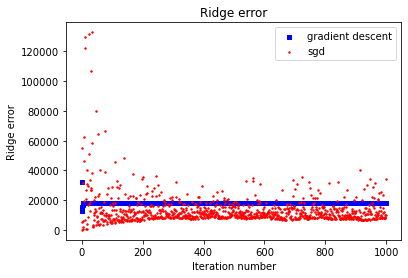

In [10]:
def cost_history(alpha, n_iter, gd_type):
    W = np.ones(X.shape[1])
    cost_history = []
    for i in range(n_iter):
        if gd_type == 0:
            y_pred = np.dot(X, W)
            err = ridge_err(y, y_pred, L, W)
            W -= (alpha * (2/n * (np.dot(X.T,(y_pred - y)) + L * W)))
        else:
            train_ind = np.random.randint(X.shape[0])
            y_pred = np.dot(X[train_ind], W)
            err = ridge_err(y[train_ind], y_pred, L, W)
            W -= (alpha * (2/n * (np.dot(X[train_ind].T, (y_pred - y[train_ind]))+ L * W)))
        cost_history.append(err)
    return cost_history

n_iter = 1000
alpha = 0.4
L = 0.5
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 0), s=20, c='b', marker="s", label='gradient descent')
ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 1), s=2, c='r', marker="o", label='sgd')

plt.title('Ridge error')
plt.xlabel('Iteration number')
plt.ylabel('Ridge error')
plt.legend(loc='upper right');
plt.show()

Добавлениe L2 -регуляризации замедляет сходимость стохастического градиентного спуска значительно в большей степени, чем сходимость градиентного спуска. Однако, если в ошибку суммировать веса, стохастический градиентного спуск часто показывет лучшие результаты по сравнению с градиентным спуском.